# Downloading and Importing Libraries

In [1]:
# natural language processing for most of the languages in this dataset (to check the list here: https://spacy.io/models)
# !pip install -U spacy

# natural language toolkit for arabic and turkish (also supports other languages) 
# (to see all available stopword languages, you can retrieve the list of fileids using: print(stopwords.fileids()))
# !pip install --user -U nltk

# indic-nlp-library for Indic languages (need it for lemmatising/stemming)
# (check documentation here: http://anoopkunchukuttan.github.io/indic_nlp_library/)
# !pip install indic-nlp-library

# a useful library for text analysis and pre-processing. Keeping it here for now, but not use it.
# (check documentation here: https://advertools.readthedocs.io/en/master/)
# !pip install advertools

In [2]:
# download the spacy models for the languages that we need
# !python -m spacy download en_core_web_sm # English 
# !python -m spacy download fr_core_news_sm # French
# !python -m spacy download es_core_news_sm # Spanish
# !python -m spacy download pt_core_news_sm # Portuguese
# !python -m spacy download it_core_news_sm # Italian
# !python -m spacy download ru_core_news_sm # Russian
# !python -m spacy download sv_core_news_sm # Swedish
# !python -m spacy download nl_core_news_sm # Dutch
# !python -m spacy download de_core_news_sm # German
# !python -m spacy download da_core_news_sm # Danish
# !python -m spacy download el_core_news_sm # Greek

# nltk.download('stopwords') # download the stopwords that are available in nltk (needed for arabic and turkish)
# nltk.download('wordnet') # download the wordnet that is available in nltk for lemmatisation

In [3]:
# for data manipulation
import pandas as pd
import re 
import numpy as np

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for natural language processing
import spacy
from spacy.lang.ml import STOP_WORDS as stopwords_ml
from spacy.lang.ta import STOP_WORDS as stopwords_ta
from spacy.lang.kn import STOP_WORDS as stopwords_kn
from spacy.lang.hi import STOP_WORDS as stopwords_hi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.arlstem2 import ARLSTem2
from snowballstemmer import TurkishStemmer 
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory

# This library also has functions to remove stopwords for Tamil, Hindi and Arabic, but 
# the quantity of stopwords is not as much as compared to the other libraries that are used.
# However it contains other languages that are not in the used libraries e.g. Japanese.
# It might be useful for future work, so I am keeping it here.
# import advertools as adv 

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB # for the Naive Bayes model (1st model)
from sklearn.svm import LinearSVC # for the Linear SVM model (2nd model)
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

# for the deep learning models
# TextCNN model (3rd model)
# GRU model (4th model)
# BiLSTM model (5th model)
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras import layers
from keras.layers import Dense, Embedding, Conv1D, Dropout, GlobalAveragePooling1D,Bidirectional, LSTM, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# hide warnings
import warnings 
warnings.filterwarnings("ignore")

# for reproducibility
import random 
seed = 42

# Importing and Exploring the Dataset

In [4]:
data = pd.read_csv("LanguageDetection.csv") # read the data

In [5]:
data.shape # check the shape of the data

(10337, 2)

In [6]:
data # check the data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [7]:
data['Language'] = data['Language'].str.replace('Sweedish', 'Swedish') # correcting the spelling of Swedish
data['Language'] = data['Language'].str.replace('Portugeese', 'Portoguese') # correcting the spelling of Portuguese

In [8]:
data['Language'].value_counts() # checking the distribution of the target variable

English       1385
French        1014
Spanish        819
Portoguese     739
Italian        698
Russian        692
Swedish        676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

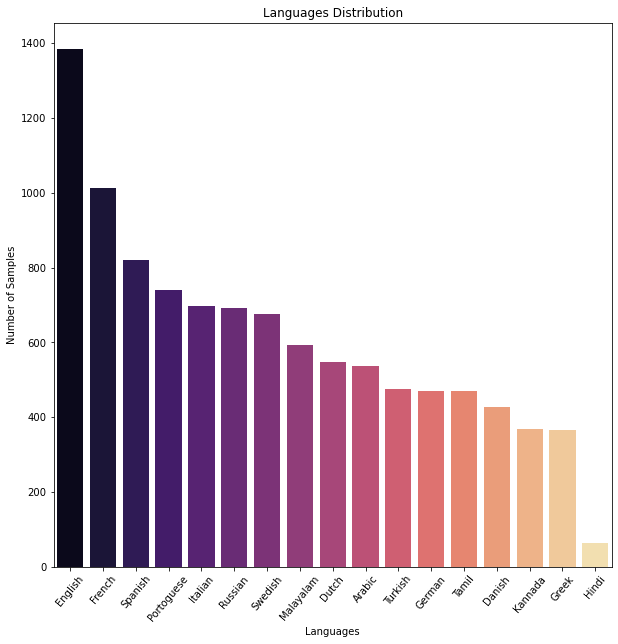

In [9]:
# plotting the distribution of the target variable
plt.figure(figsize=(10,10))
sns.barplot(x=data['Language'].value_counts().index, y=data['Language'].value_counts().values, palette='magma')
plt.title('Languages Distribution')
plt.xlabel('Languages')
plt.ylabel('Number of Samples')
plt.xticks(rotation=50)
plt.show()

# Text Pre-processing

In [10]:
norm_data = data.copy() # creating a copy of the original dataset and working on the copy

In [11]:
len(norm_data[norm_data.duplicated()]) # check for duplicates

66

In [12]:
norm_data.drop_duplicates(inplace=True) # drop duplicates

In [13]:
# load spaCy models for the languages that we need
nlp_en = spacy.load("en_core_web_sm") 
nlp_fr = spacy.load("fr_core_news_sm")
nlp_es = spacy.load("es_core_news_sm")
nlp_pt = spacy.load("pt_core_news_sm")
nlp_it = spacy.load("it_core_news_sm")
nlp_ru = spacy.load("ru_core_news_sm")
nlp_sv = spacy.load("sv_core_news_sm")
nlp_nl = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")
nlp_da = spacy.load("da_core_news_sm")
nlp_gr = spacy.load("el_core_news_sm")

# function to remove stopwords with spaCy for the most of languages of the dataset
def remove_stopwords(df, is_lower_case=False):
  if df['Language'] == 'English':
        df['Text'] = ' '.join([token.text for token in nlp_en(df['Text']) if not token.is_stop])
  elif df['Language'] == 'French':
        df['Text'] = ' '.join([token.text for token in nlp_fr(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Spanish':
        df['Text'] = ' '.join([token.text for token in nlp_es(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Portuguese':
        df['Text'] = ' '.join([token.text for token in nlp_pt(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Italian':
        df['Text'] = ' '.join([token.text for token in nlp_it(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Russian':
        df['Text'] = ' '.join([token.text for token in nlp_ru(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Swedish':
        df['Text'] = ' '.join([token.text for token in nlp_sv(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Dutch':
        df['Text'] = ' '.join([token.text for token in nlp_nl(df['Text']) if not token.is_stop])
  elif df['Language'] == 'German':
        df['Text'] = ' '.join([token.text for token in nlp_de(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Danish':
        df['Text'] = ' '.join([token.text for token in nlp_da(df['Text']) if not token.is_stop])
  elif df['Language'] == 'Greek':
        df['Text'] = ' '.join([token.text for token in nlp_gr(df['Text']) if not token.is_stop])
  return df   

In [14]:
norm_data = norm_data.apply(remove_stopwords, axis=1) # apply the function to the dataset

In [15]:
tokenizer = ToktokTokenizer()

stopwords_ar = set(stopwords.words('arabic'))

# function to remove arabic stopwords
def remove_stopwords_ar(df, is_lower_case = False):
  if df['Language'] == 'Arabic':
    text = df['Text']
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopwords_ar]
    # else:
    #   filtered_tokens = [token for token in tokens if token.lower() not in stopwords_ar]
    filtered_text = ' '.join(filtered_tokens)    
    df['Text'] = filtered_text
  return df

In [16]:
# apply the function to the dataset for Arabic
norm_data = norm_data.apply(remove_stopwords_ar, axis=1)

In [17]:
stopwords_tr = set(stopwords.words('turkish'))

# function to remove turkish stopwords
def remove_stopwords_tr(df, is_lower_case = False):
  if df['Language'] == 'Turkish':
    text = df['Text']
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopwords_tr]
    # else:
    #   filtered_tokens = [token for token in tokens if token.lower() not in stopwords_tr]
    filtered_text = ' '.join(filtered_tokens)    
    df['Text'] = filtered_text  
  return df

In [18]:
# apply the function to the dataset for Turkish
norm_data = norm_data.apply(remove_stopwords_tr, axis=1)

In [19]:
# function to remove hindi stopwords
def remove_stopwords_hi(df, is_lower_case = False):
  if df['Language'] == 'Hindi':
    text = df['Text']
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopwords_hi]
    # else:
    #   filtered_tokens = [token for token in tokens if token.lower() not in stopwords_hi]
    filtered_text = ' '.join(filtered_tokens)    
    df['Text'] = filtered_text
  return df

In [20]:
# apply the function to the dataset for Hindi
norm_data = norm_data.apply(remove_stopwords_hi, axis=1)

In [21]:
# function to remove kannada stopwords
def remove_stopwords_kn(df, is_lower_case = False):
  if df['Language'] == 'Kannada':
    tokens = tokenizer.tokenize(df['Text'])
    tokens = [token.strip() for token in tokens]
    # if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopwords_kn]
    # else:
    #   filtered_tokens = [token for token in tokens if token.lower() not in stopwords_kn]
    filtered_text = ' '.join(filtered_tokens)    
    df['Text'] = filtered_text
  return df

In [22]:
# apply the function to the dataset for Kannada
norm_data = norm_data.apply(remove_stopwords_kn, axis=1)

In [23]:
# function to remove malayalam stopwords
def remove_stopwords_ml(df, is_lower_case = False):
  if df['Language'] == 'Malayalam':
    text = df['Text']
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
  # if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopwords_ml]
  # else:
  #  filtered_tokens = [token for token in tokens if token.lower() not in stopwords_ml]
    filtered_text = ' '.join(filtered_tokens)  
    df['Text'] = filtered_text  
  return df

In [24]:
norm_data = norm_data.apply(remove_stopwords_ml, axis=1)

In [25]:
# function to remove tamil stopwords
def remove_stopwords_ta(df, is_lower_case = False):
    if df['Language'] == 'Tamil':
        text = df['Text']
        tokens = tokenizer.tokenize(text)
        tokens = [token.strip() for token in tokens]
    # if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_ta]
    # else:
    #   filtered_tokens = [token for token in tokens if token.lower() not in stopwords_ta]
        filtered_text = ' '.join(filtered_tokens)  
        df['Text'] = filtered_text  
    return df

In [26]:
norm_data = norm_data.apply(remove_stopwords_ta, axis=1)

In [27]:
# function to lemmatize text with spacy
def lemmatisation(df):
    if df['Language'] == 'English':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_en(df['Text'])])
    elif df['Language'] == 'French':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_fr(df['Text'])])
    elif df['Language'] == 'Spanish':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_es(df['Text'])])
    elif df['Language'] == 'Portuguese':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_pt(df['Text'])])  
    elif df['Language'] == 'Italian':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_it(df['Text'])])
    elif df['Language'] == 'Russian':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_ru(df['Text'])])
    elif df['Language'] == 'Swedish':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_sv(df['Text'])])
    elif df['Language'] == 'Dutch':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_nl(df['Text'])])
    elif df['Language'] == 'German':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_de(df['Text'])])
    elif df['Language'] == 'Danish':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_da(df['Text'])])
    elif df['Language'] == 'Greek':
        df['Text'] = ' '.join([token.lemma_ for token in nlp_gr(df['Text'])])
    return df       

In [28]:
norm_data = norm_data.apply(lemmatisation, axis=1)

In [29]:
stemmer_ar = ARLSTem2()

# function to stem arabic text
def stem_ar(df):
    if df['Language'] == 'Arabic':
        text = df['Text']
        tokens = tokenizer.tokenize(text)
        tokens = [token.strip() for token in tokens]
        stemmed_tokens = [stemmer_ar.stem(token) for token in tokens]
        text = ' '.join(stemmed_tokens)
        df['Text'] = text
    return df

In [30]:
norm_data = norm_data.apply(stem_ar, axis=1)

In [31]:
stemmer_tr = TurkishStemmer()

# function to stem turkish text
def stem_tr(df):
    if df['Language'] == 'Turkish':
        text = df['Text']
        tokens = tokenizer.tokenize(text)
        tokens = [token.strip() for token in tokens]
        stemmed_tokens = [stemmer_tr.stemWord(token) for token in tokens]
        text = ' '.join(stemmed_tokens)
        df['Text'] = text
    return df

In [32]:
norm_data = norm_data.apply(stem_tr, axis=1)

In [33]:
normalizer_factory = IndicNormalizerFactory()

# functions to normalize malayalam, hindi, kannada and tamil text

def lemmatise_ml(df, remove_nuktas=False): # nuktas are diacritics marks 
  if df['Language'] == 'Malayalam':
    text = df['Text']
    normalizer = normalizer_factory.get_normalizer("ml", remove_nuktas=remove_nuktas)
    text = normalizer.normalize(text)
    df['Text'] = text
  return df

def lemmatise_hi(df, remove_nuktas=False):
  if df['Language'] == 'Hindi':
    text = df['Text']
    normalizer = normalizer_factory.get_normalizer("hi", remove_nuktas=remove_nuktas)
    text = normalizer.normalize(text)
    df['Text'] = text
  return df 

def lemmatise_kn(df, remove_nuktas=False):
  if df['Language'] == 'Kannada':
    text = df['Text']
    normalizer = normalizer_factory.get_normalizer("kn", remove_nuktas=remove_nuktas)
    text = normalizer.normalize(text)
    df['Text'] = text
  return df

def lemmatise_ta(df, remove_nuktas=False):
  if df['Language'] == 'Tamil':
    text = df['Text']
    normalizer = normalizer_factory.get_normalizer("ta", remove_nuktas=remove_nuktas)
    text = normalizer.normalize(text)
    df['Text'] = text
  return df

In [34]:
norm_data = norm_data.apply(lemmatise_ml, axis=1)
norm_data = norm_data.apply(lemmatise_hi, axis=1)
norm_data = norm_data.apply(lemmatise_kn, axis=1)
norm_data = norm_data.apply(lemmatise_ta, axis=1)

In [35]:
# function to remove numbers, symbols, links and extra spaces
def extra_clean(text):
  text = re.sub(r'[\([{})\]!@#$,/"%^*?.:-;~`0-9]', ' ', text) # removing the symbols, numbers, punctuations etc.
  text = text.lower() # converting the text to lower case
  text = re.sub(r' +', ' ', text) # removing extra spaces
  text = re.sub(r'(\w+:\/\/\S+)', ' ', text) # removing links
  # removing words of up to 3 characters does not work well with indic languages. It returns weird symbols
  # text = re.sub(r'\b\w{1,3}\b', ' ', text) 
  return text 

In [36]:
norm_data["Text"] = norm_data["Text"].apply(lambda x: extra_clean(x))

In [37]:
# function to remove english characters from non-english text
def remove_english_char(text):
    text = re.sub(r'[a-zA-Z]+', '', text)
    return text

In [38]:
# removing english characters from 7 non-english languages (Greek, Arabic, Hindi, Malayalam, Tamil, Kannada, Russian)
# english characthers should be removed from the other languages as well (obviously not English), but the english characters 
# are similar to the characters of the other languages. It should be considered in the future.
norm_data.loc[norm_data['Language'] == 'Greek', 'Text'] = norm_data.loc[norm_data['Language'] == 'Greek', 'Text'].apply(lambda x: remove_english_char(x))
norm_data.loc[norm_data['Language'] == 'Arabic', 'Text'] = norm_data.loc[norm_data['Language'] == 'Arabic', 'Text'].apply(lambda x: remove_english_char(x))
norm_data.loc[norm_data['Language'] == 'Hindi', 'Text'] = norm_data.loc[norm_data['Language'] == 'Hindi', 'Text'].apply(lambda x: remove_english_char(x))
norm_data.loc[norm_data['Language'] == 'Malayalam', 'Text'] = norm_data.loc[norm_data['Language'] == 'Malayalam', 'Text'].apply(lambda x: remove_english_char(x))
norm_data.loc[norm_data['Language'] == 'Tamil', 'Text'] = norm_data.loc[norm_data['Language'] == 'Tamil', 'Text'].apply(lambda x: remove_english_char(x))
norm_data.loc[norm_data['Language'] == 'Kannada', 'Text'] = norm_data.loc[norm_data['Language'] == 'Kannada', 'Text'].apply(lambda x: remove_english_char(x))
norm_data.loc[norm_data['Language'] == 'Russian', 'Text'] = norm_data.loc[norm_data['Language'] == 'Russian', 'Text'].apply(lambda x: remove_english_char(x))

In [39]:
# function to remove extra hyphens, after the text is normalized some hyphens are left
def remove_extra_hyphens(text):
    text = re.sub(r'[-]+', ' ', text)
    return text

In [40]:
norm_data["Text"] = norm_data["Text"].apply(lambda x: remove_extra_hyphens(x))

In [41]:
# function to remove empty cells because empty texts were left after the normalization
def remove_empty_texts(df):
    df = df[df['Text'].str.strip().astype(bool)]
    return df

In [42]:
norm_data = remove_empty_texts(norm_data)

In [43]:
len(norm_data[norm_data.duplicated()]) # check for duplicates again

82

In [44]:
norm_data.drop_duplicates(inplace=True) # drop duplicates

In [45]:
norm_data['Language'].value_counts() # checking the distribution of the target variable in the normalized data

English       1359
French         992
Spanish        791
Portoguese     736
Italian        673
Russian        668
Swedish        645
Malayalam      588
Arabic         529
Dutch          524
Turkish        471
Tamil          463
German         439
Danish         404
Kannada        365
Greek          349
Hindi           62
Name: Language, dtype: int64

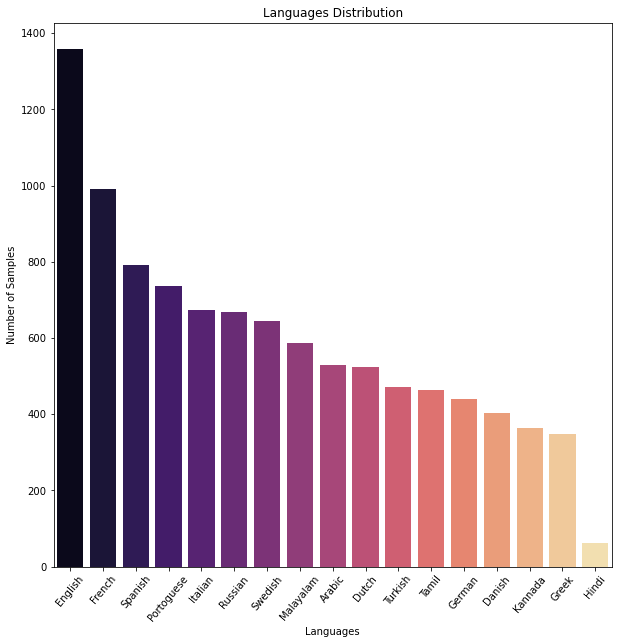

In [46]:
# plotting the distribution of the target variable in the normalized data
plt.figure(figsize=(10,10))
sns.barplot(x=norm_data['Language'].value_counts().index, y=norm_data['Language'].value_counts().values, palette='magma')
plt.title('Languages Distribution')
plt.xlabel('Languages')
plt.ylabel('Number of Samples')
plt.xticks(rotation=50)
plt.show()

# Train and Test Split

In [47]:
# splitting the normalized into train and test set (65% train and 35% test)
train_data, test_data = train_test_split(norm_data, test_size=0.35, random_state=19, stratify=norm_data['Language'])

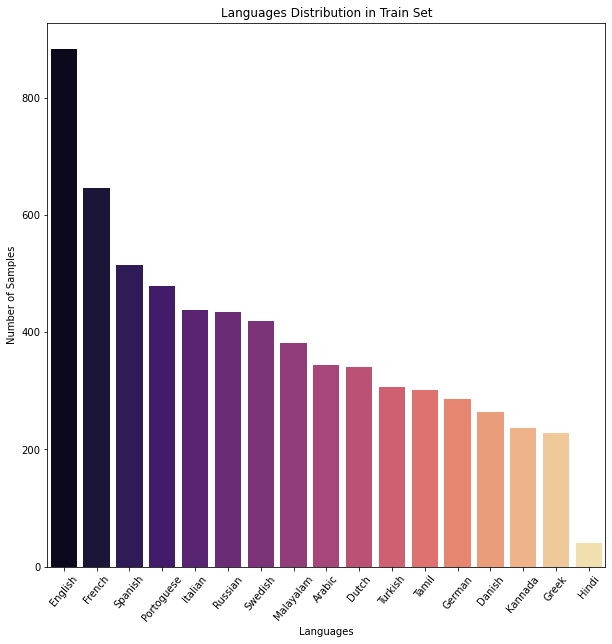

In [48]:
# checking the distribution of the target variable in the train set
plt.figure(figsize=(10,10))
sns.barplot(x=train_data['Language'].value_counts().index, y=train_data['Language'].value_counts().values, palette='magma')
plt.title('Languages Distribution in Train Set')
plt.xlabel('Languages')
plt.ylabel('Number of Samples')
plt.xticks(rotation=50)
plt.show()

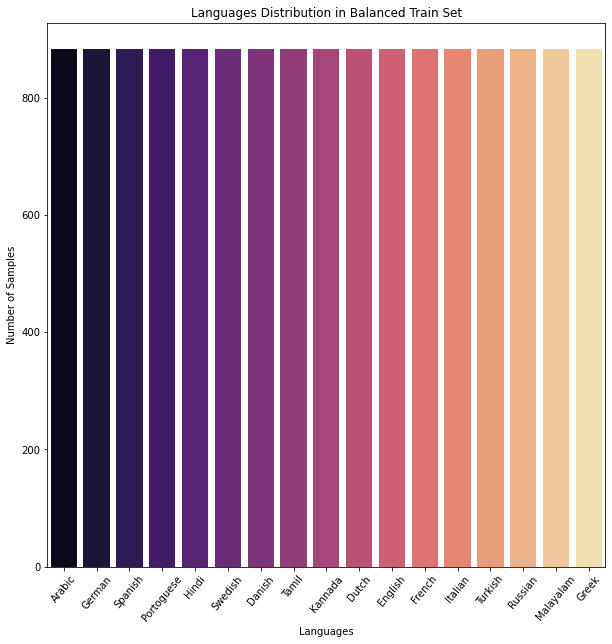

In [49]:
# oversampling the train set to balance the target variable
languages = train_data['Language'].unique()
count_languages = train_data['Language'].value_counts()
max_count = count_languages.max()
balanced_train = pd.DataFrame(columns=['Text', 'Language'])

for i in languages:
    random_indices = np.random.choice(train_data[train_data['Language'] == i].index, max_count, replace=True)
    balanced_train = balanced_train.append(train_data.loc[random_indices])

# checking the distribution of the target variable in the balanced train set
plt.figure(figsize=(10,10))
sns.barplot(x=balanced_train['Language'].value_counts().index, y=balanced_train['Language'].value_counts().values, palette='magma')
plt.title('Languages Distribution in Balanced Train Set')
plt.xlabel('Languages')
plt.ylabel('Number of Samples')
plt.xticks(rotation=50)
plt.show()

In [50]:
# cleaning the balanced train set because commas, equals signs and other symbols in the indic languages are observed in the text after oversampling
balanced_train["Text"] = balanced_train["Text"].apply(lambda x: extra_clean(x))

# Model Selection

The following models were used in this project:
* Naive Bayes with CountVectorizer and TF-IDF Vectorizer
* Linear Support Vector Machine with CountVectorizer and TF-IDF Vectorizer
* TextCNN
* Gated Recurrent Unit (GRU)
* BiDirectional Long Short-Term Memory (BiLSTM)


CountVectorizer and TfidfVectorizer are used in natural language processing to vectorise text data. CountVectorizer counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer considers how many times a word appears in a document and how important that word is to the whole corpus. Both methods would be compared based on their performance in the classification tasks.

## Naive Bayes with CountVectorizer

In [74]:
# creating a pipeline with CountVectorizer and MultinomialNB
BayesCountVectorizer = Pipeline([('countVectorizer', CountVectorizer()),('MultinomialNB', MultinomialNB())])

BayesCountVectorizer.fit(balanced_train['Text'], balanced_train['Language']) # fitting the pipeline with the balanced train set
preds = BayesCountVectorizer.predict(test_data['Text']) # predicting the test set

In [75]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) 

              precision    recall  f1-score   support

     English       0.59      1.00      0.74       185
  Portoguese       0.87      0.87      0.87       141
       Dutch       0.97      0.89      0.93       183
      Arabic       0.97      0.95      0.96       476
     Turkish       1.00      0.95      0.97       347
      French       0.94      0.84      0.89       154
     Swedish       1.00      0.92      0.96       122
     Italian       1.00      0.95      0.98        22
   Malayalam       0.97      0.91      0.94       235
     Kannada       1.00      0.95      0.97       128
       Greek       1.00      0.99      0.99       206
     Russian       0.96      0.99      0.97       258
       Tamil       1.00      0.94      0.97       234
     Spanish       0.97      0.91      0.94       277
      German       0.96      0.94      0.95       226
      Danish       1.00      0.96      0.98       162
       Hindi       0.98      0.97      0.98       165

    accuracy              

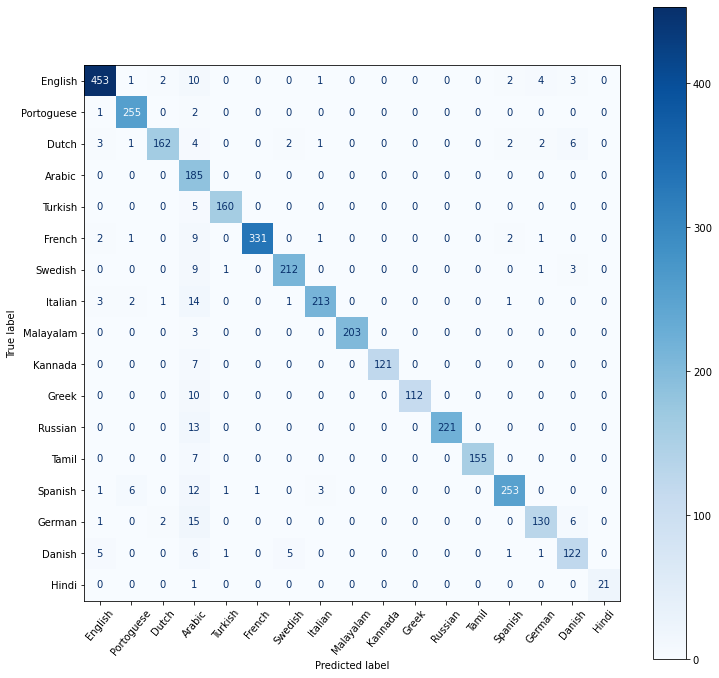

In [76]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Grid Search for Hyperparameter Tuning for Naive Bayes with CountVectorizer

In [ ]:
parameters = {
    'countVectorizer__binary': (True, False),
    'countVectorizer__ngram_range': [(1, 1), (1, 2)],
    'MultinomialNB__alpha': (0.1, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5)
    }

GridSearch = GridSearchCV(BayesCountVectorizer, parameters, cv=5)
#GridSearch.get_params().keys()
GridSearch.fit(balanced_train['Text'], balanced_train['Language'])

In [ ]:
print(GridSearch.best_params_)

In [ ]:
# Naive Bayes with CountVectorizer and best parameters.
BayesCountVectorizer = Pipeline([('countVectorizer', CountVectorizer(binary=True, ngram_range=(1, 2))),('MultinomialNB', MultinomialNB(alpha=0.1))])

# fitting the pipeline with the balanced train set
BayesCountVectorizer.fit(balanced_train['Text'], balanced_train['Language'])
preds = BayesCountVectorizer.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Naive Bayes with TF-IDF Vectorizer

In [ ]:
# creating a pipeline with TfidfVectorizer and MultinomialNB
BayesTfid = Pipeline([('tfidfVectorizer', TfidfVectorizer()),('MultinomialNB', MultinomialNB())])

BayesTfid.fit(balanced_train['Text'], balanced_train['Language']) # fitting the pipeline with the balanced train set
preds = BayesTfid.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Grid Search for Hyperparameter Tuning for Naive Bayes with TF-IDF Vectorizer

In [ ]:
parameters = {
    'tfidfVectorizer__binary': (True, False),
    'tfidfVectorizer__ngram_range': [(1, 1), (1, 2)],
    'MultinomialNB__alpha': (0.1, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5)
    }

GridSearch = GridSearchCV(BayesTfid, parameters, cv=5)
#GridSearch.get_params().keys()
GridSearch.fit(balanced_train['Text'], balanced_train['Language'])

In [ ]:
print(GridSearch.best_params_)

In [ ]:
# Naive Bayes with TfidfVectorizer and best parameters.
BayesTfid = Pipeline([('tfidfVectorizer', TfidfVectorizer(binary=True, ngram_range=(1, 2))),('MultinomialNB', MultinomialNB(alpha=0.1))])

# fitting the pipeline with the balanced train set
BayesTfid.fit(balanced_train['Text'], balanced_train['Language'])
preds = BayesTfid.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Linear SVC with CountVectorizer

In [ ]:
# creating a pipeline with CountVectorizer and LinearSVC
LinearSVC_CountVectorizer = Pipeline([('countVectorizer', CountVectorizer()),('LinearSVC', LinearSVC())])

LinearSVC_CountVectorizer.fit(balanced_train['Text'], balanced_train['Language']) # fitting the pipeline with the balanced train set
preds = LinearSVC_CountVectorizer.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Grid Search for Hyperparameter Tuning for Linear SVC with CountVectorizer

In [ ]:
parameters = {
    'countVectorizer__binary': (True, False),
    'countVectorizer__ngram_range': [(1, 1), (1, 2)],
    'LinearSVC__C': (0.1,1,5,10,20,50,70,100),
    }

GridSearch = GridSearchCV(LinearSVC_CountVectorizer, parameters, cv=5)
# GridSearch.get_params().keys()
GridSearch.fit(balanced_train['Text'], balanced_train['Language'])

In [ ]:
print(GridSearch.best_params_)

In [ ]:
# SVM with CountVectorizer and best parameters.
LinearSVC_CountVectorizer = Pipeline([('countVectorizer', CountVectorizer(binary=False, ngram_range=(1, 1))),
('LinearSVC', LinearSVC(C=1))])

# fitting the pipeline with the balanced train set
LinearSVC_CountVectorizer.fit(balanced_train['Text'], balanced_train['Language'])
preds = LinearSVC_CountVectorizer.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Linear SVC with TF-IDF Vectorizer

In [ ]:
# creating a pipeline with TfidfVectorizer and LinearSVC
LinearSVC_Tidf = Pipeline([('tfidfVectorizer', TfidfVectorizer()),('LinearSVC', LinearSVC())])

LinearSVC_Tidf.fit(balanced_train['Text'], balanced_train['Language']) # fitting the pipeline with the balanced train set
preds = LinearSVC_Tidf.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
# plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Grid Search for Hyperparameter Tuning for Linear SVC with TF-IDF Vectorizer

In [ ]:
parameters = {
    'tfidfVectorizer__binary': (True, False),
    'tfidfVectorizer__ngram_range': [(1, 1), (1, 2)],
    'LinearSVC__C': (0.1,1,5,10,20,50,70,100),
    }

GridSearch = GridSearchCV(LinearSVC_Tidf, parameters, cv=5)
#GridSearch.get_params().keys()
GridSearch.fit(balanced_train['Text'], balanced_train['Language'])

In [ ]:
# print best parameters
print(GridSearch.best_params_)

In [ ]:
# SVM with TfidfVectorizer and best parameters.
LinearSVC_Tidf = Pipeline([('tfidfVectorizer', TfidfVectorizer(binary=True, ngram_range=(1, 2))),
('LinearSVC', LinearSVC(C=5))])

# fitting the pipeline with the balanced train set
LinearSVC_Tidf.fit(balanced_train['Text'], balanced_train['Language'])
preds = LinearSVC_Tidf.predict(test_data['Text']) # predicting the test set

In [ ]:
# printing the classification report
print(classification_report(test_data['Language'], preds, target_names=languages)) # classification report

In [ ]:
#plot confusion matrix
cm = confusion_matrix(test_data['Language'], preds, labels=languages)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## TextCNN

In [51]:
# pre-processing the data for deep learning models

max_num_words = 15000

# create a tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# fit the tokenizer on the training data
tokenizer.fit_on_texts(balanced_train['Text'].values)

# transform the training and test data
X_train = tokenizer.texts_to_sequences(balanced_train['Text'].values)
X_test = tokenizer.texts_to_sequences(test_data['Text'].values)

# pad the sequences
max_seq_length = 200
X_train = pad_sequences(X_train, maxlen = max_seq_length)
X_train = np.array(X_train)
X_test = pad_sequences(X_test, maxlen = max_seq_length)
X_test = np.array(X_test)

# one-hot encode the labels
y_train = pd.get_dummies(balanced_train['Language']).values
y_test = pd.get_dummies(test_data['Language']).values

# print the shape of the training and test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15011, 200) (15011, 17)
(3521, 200) (3521, 17)


In [52]:
embedding_dim = 128
input_len = X_train.shape[1]
vocab_size = len(tokenizer.word_index) + 1 

# create the model
def build_TextCNN():
    # create a sequential model
    model = Sequential()

    # add embedding layer, convolutional layer, dropout layer, convolutional layer, 
    # global average pooling layer and dense layer
    model.add(Embedding(vocab_size, embedding_dim,input_length = input_len))
    model.add(Conv1D(128, 10, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(256, 10, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(17, activation='softmax'))
    
    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = build_TextCNN()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          3344640   
                                                                 
 conv1d (Conv1D)             (None, 191, 128)          163968    
                                                                 
 dropout (Dropout)           (None, 191, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 182, 256)          327936    
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 17)                4369      
                                                        

In [53]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=20)

Epoch 1/20
118/118 [==============================] - 33s 276ms/step - loss: 2.5844 - accuracy: 0.1334 - val_loss: 2.4331 - val_accuracy: 0.1795
Epoch 2/20
118/118 [==============================] - 33s 277ms/step - loss: 2.0476 - accuracy: 0.2921 - val_loss: 2.0583 - val_accuracy: 0.3138
Epoch 3/20
118/118 [==============================] - 32s 275ms/step - loss: 1.5487 - accuracy: 0.4785 - val_loss: 1.7760 - val_accuracy: 0.4450
Epoch 4/20
118/118 [==============================] - 32s 269ms/step - loss: 1.0710 - accuracy: 0.6415 - val_loss: 1.5437 - val_accuracy: 0.5166
Epoch 5/20
118/118 [==============================] - 32s 271ms/step - loss: 0.7534 - accuracy: 0.7540 - val_loss: 1.4355 - val_accuracy: 0.5885
Epoch 6/20
118/118 [==============================] - 32s 272ms/step - loss: 0.5693 - accuracy: 0.8092 - val_loss: 1.4500 - val_accuracy: 0.6260
Epoch 7/20
118/118 [==============================] - 32s 270ms/step - loss: 0.4760 - accuracy: 0.8412 - val_loss: 1.4818 - val_ac

In [54]:
def plot_results(history):
    
    test_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(test_loss)
    plt.legend(['Training','Test'])
    plt.xticks(range(len(loss)),labels=range(1, len(loss)+ 1))

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(test_acc)
    plt.legend(['Training','Test'])
    plt.xticks(range(len(loss)),labels=range(1, len(loss)+ 1))

    plt.show()

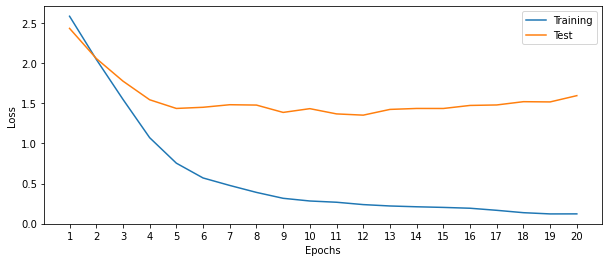

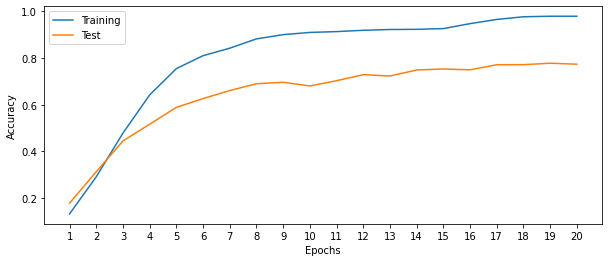

In [55]:
plot_results(history)

In [56]:
# predict target values on the test data
preds = model.predict(X_test)

# convert the predicted values to the original labels
preds = np.argmax(preds, axis=1)

# convert the test labels to the original labels
y_test = np.argmax(y_test, axis=1)

# print the classification report
print(classification_report(y_test, preds, target_names=languages))

111/111 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

     English       1.00      0.78      0.88       185
  Portoguese       0.73      0.63      0.68       141
       Dutch       0.70      0.75      0.73       183
      Arabic       0.84      0.76      0.80       476
     Turkish       0.71      0.82      0.76       347
      French       0.57      0.66      0.61       154
     Swedish       0.32      0.98      0.48       122
     Italian       0.89      0.77      0.83        22
   Malayalam       0.88      0.66      0.76       235
     Kannada       0.89      0.79      0.84       128
       Greek       0.98      0.77      0.86       206
     Russian       0.99      0.88      0.93       258
       Tamil       0.78      0.79      0.79       234
     Spanish       0.93      0.71      0.80       277
      German       0.76      0.78      0.77       226
      Danish       0.90      0.80      0.85       162
       Hindi       0.90  

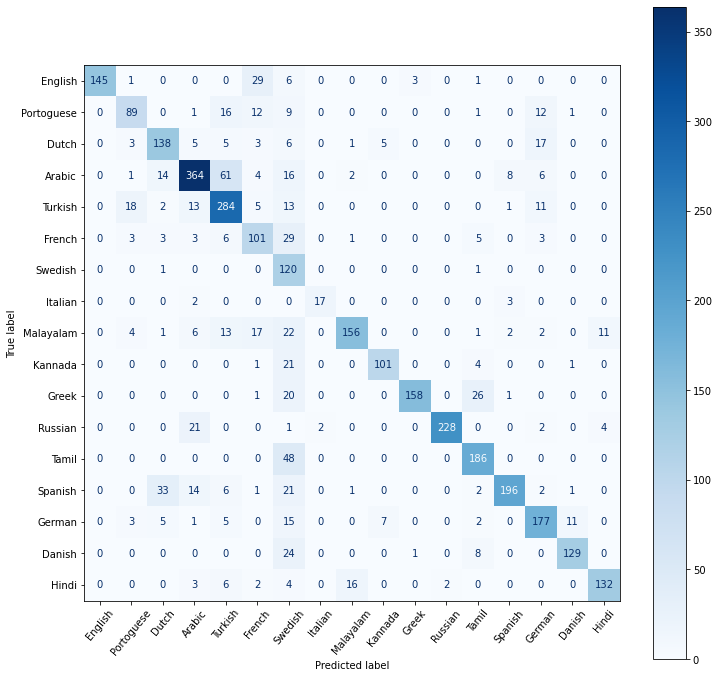

In [57]:
# plot the confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## Gated Recurrent Unit (GRU)

In [58]:
# pre-processing the data for deep learning models

max_num_words = 15000

# create a tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# fit the tokenizer on the training data
tokenizer.fit_on_texts(balanced_train['Text'].values)

# transform the training and test data
X_train = tokenizer.texts_to_sequences(balanced_train['Text'].values)
X_test = tokenizer.texts_to_sequences(test_data['Text'].values)

# pad the sequences
max_seq_length = 200
X_train = pad_sequences(X_train, maxlen = max_seq_length)
X_train = np.array(X_train)
X_test = pad_sequences(X_test, maxlen = max_seq_length)
X_test = np.array(X_test)

# one-hot encode the labels
y_train = pd.get_dummies(balanced_train['Language']).values
y_test = pd.get_dummies(test_data['Language']).values

# print the shape of the training and test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15011, 200) (15011, 17)
(3521, 200) (3521, 17)


In [59]:
# create the model
embedding_dim = 128
input_len = X_train.shape[1]
vocab_size = len(tokenizer.word_index) + 1 

def build_GRU():

    # create a sequential model
    model = Sequential()

    # add one embedding layer, one GRU layer and one dense layer
    model.add(Embedding(vocab_size, embedding_dim, input_length = input_len))
    model.add(GRU(64))
    model.add(Dense(17, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = build_GRU()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          3344640   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 17)                1105      
                                                                 
Total params: 3,382,993
Trainable params: 3,382,993
Non-trainable params: 0
_________________________________________________________________


In [60]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=7)

Epoch 1/7
118/118 [==============================] - 24s 178ms/step - loss: 2.0922 - accuracy: 0.5128 - val_loss: 1.1332 - val_accuracy: 0.7893
Epoch 2/7
118/118 [==============================] - 19s 164ms/step - loss: 0.3425 - accuracy: 0.9601 - val_loss: 0.4747 - val_accuracy: 0.8855
Epoch 3/7
118/118 [==============================] - 19s 164ms/step - loss: 0.1043 - accuracy: 0.9814 - val_loss: 0.3978 - val_accuracy: 0.8949
Epoch 4/7
118/118 [==============================] - 19s 165ms/step - loss: 0.0716 - accuracy: 0.9829 - val_loss: 0.4043 - val_accuracy: 0.8898
Epoch 5/7
118/118 [==============================] - 23s 192ms/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.3705 - val_accuracy: 0.8995
Epoch 6/7
118/118 [==============================] - 19s 161ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.3647 - val_accuracy: 0.8972
Epoch 7/7
118/118 [==============================] - 19s 161ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.3635 - val_accuracy:

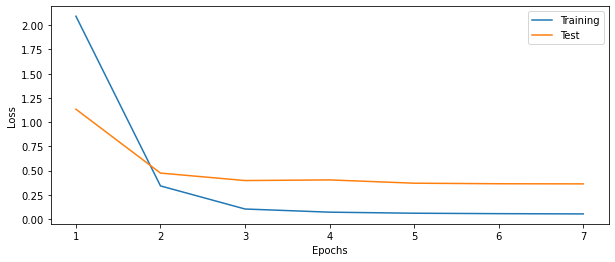

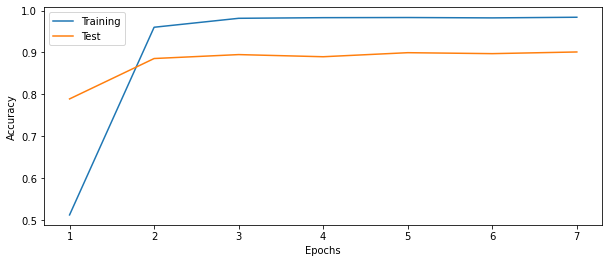

In [61]:
plot_results(history)

In [62]:
# predict target values on the test data
preds = model.predict(X_test)

# convert the predicted values to the original labels
preds = np.argmax(preds, axis=1)

# convert the test labels to the original labels
y_test = np.argmax(y_test, axis=1)

# print the classification report
print(classification_report(y_test, preds, target_names=languages))

111/111 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

     English       1.00      0.95      0.97       185
  Portoguese       0.83      0.79      0.81       141
       Dutch       0.94      0.84      0.89       183
      Arabic       0.93      0.93      0.93       476
     Turkish       0.98      0.93      0.96       347
      French       0.39      0.91      0.55       154
     Swedish       0.99      0.87      0.93       122
     Italian       1.00      1.00      1.00        22
   Malayalam       0.96      0.84      0.90       235
     Kannada       0.96      0.87      0.91       128
       Greek       0.96      0.92      0.94       206
     Russian       1.00      0.97      0.98       258
       Tamil       1.00      0.88      0.94       234
     Spanish       0.93      0.89      0.91       277
      German       0.93      0.88      0.91       226
      Danish       0.99      0.84      0.91       162
       Hindi       0.98  

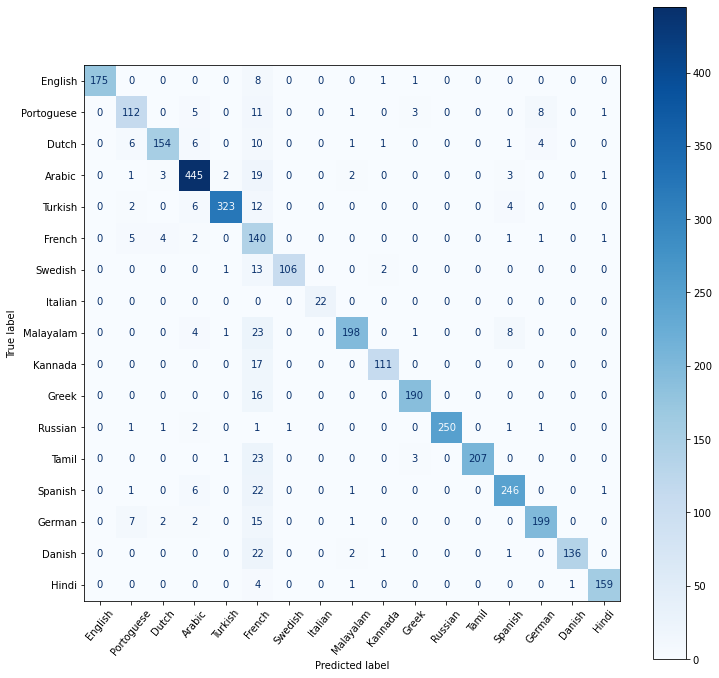

In [63]:
# plot the confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()

## BiDirectional Long Short-Term Memory (BiLSTM)

In [67]:
# pre-processing the data for deep learning models

max_num_words = 15000

# create a tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# fit the tokenizer on the training data
tokenizer.fit_on_texts(balanced_train['Text'].values)

# transform the training and test data
X_train = tokenizer.texts_to_sequences(balanced_train['Text'].values)
X_test = tokenizer.texts_to_sequences(test_data['Text'].values)

# pad the sequences
max_seq_length = 200
X_train = pad_sequences(X_train, maxlen = max_seq_length)
X_train = np.array(X_train)
X_test = pad_sequences(X_test, maxlen = max_seq_length)
X_test = np.array(X_test)

# one-hot encode the labels
y_train = pd.get_dummies(balanced_train['Language']).values
y_test = pd.get_dummies(test_data['Language']).values

# print the shape of the training and test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15011, 200) (15011, 17)
(3521, 200) (3521, 17)


In [68]:
embedding_dim = 128  # Embedding dimension
input_len = X_train.shape[1]  # Length of input sequences
vocab_size = len(tokenizer.word_index) + 1

# create the model
def build_RNN():

    # create a sequential model
    model = Sequential()

    # add one embedding layer, one bidirectional LSTM layer and one dense layer
    model.add(Embedding(vocab_size, embedding_dim, input_length= input_len)) 
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(17, activation='softmax'))

    # compile the model
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    
    return model

# print the summary of the model
model = build_RNN()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          3344640   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 17)                1105      
                                                                 
Total params: 3,386,961
Trainable params: 3,386,961
Non-trainable params: 0
_________________________________________________________________


In [69]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=7)

Epoch 1/7
118/118 [==============================] - 28s 215ms/step - loss: 2.3743 - accuracy: 0.4753 - val_loss: 1.8760 - val_accuracy: 0.5291
Epoch 2/7
118/118 [==============================] - 23s 194ms/step - loss: 1.0089 - accuracy: 0.8961 - val_loss: 0.8471 - val_accuracy: 0.8659
Epoch 3/7
118/118 [==============================] - 23s 195ms/step - loss: 0.3409 - accuracy: 0.9680 - val_loss: 0.5541 - val_accuracy: 0.8901
Epoch 4/7
118/118 [==============================] - 24s 199ms/step - loss: 0.1723 - accuracy: 0.9785 - val_loss: 0.4706 - val_accuracy: 0.8969
Epoch 5/7
118/118 [==============================] - 23s 198ms/step - loss: 0.1124 - accuracy: 0.9806 - val_loss: 0.4339 - val_accuracy: 0.8938
Epoch 6/7
118/118 [==============================] - 23s 195ms/step - loss: 0.0882 - accuracy: 0.9819 - val_loss: 0.4328 - val_accuracy: 0.8884
Epoch 7/7
118/118 [==============================] - 23s 194ms/step - loss: 0.0755 - accuracy: 0.9832 - val_loss: 0.3915 - val_accuracy:

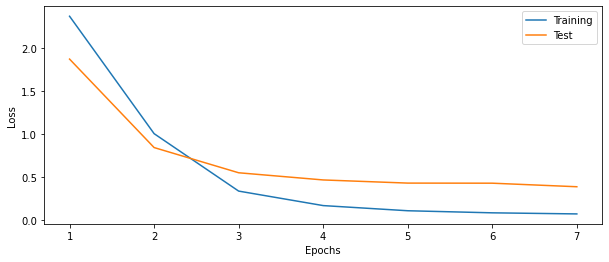

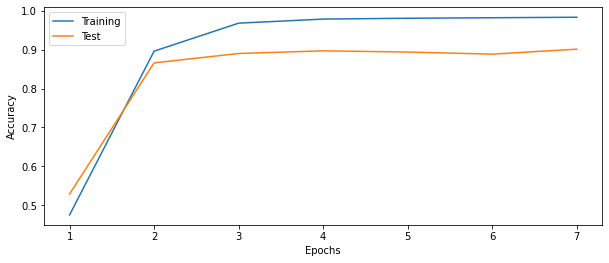

In [70]:
plot_results(history)

In [71]:
# predict target values on the test data
preds = model.predict(X_test)

# convert the predicted values to the original labels
preds = np.argmax(preds, axis=1)

# convert the test labels to the original labels
y_test = np.argmax(y_test, axis=1)

# print the classification report
print(classification_report(y_test, preds, target_names=languages))

111/111 [==============================] - 3s 22ms/step
              precision    recall  f1-score   support

     English       0.99      0.96      0.98       185
  Portoguese       0.84      0.79      0.81       141
       Dutch       0.94      0.83      0.88       183
      Arabic       0.96      0.91      0.94       476
     Turkish       0.98      0.93      0.95       347
      French       0.39      0.93      0.55       154
     Swedish       0.93      0.89      0.91       122
     Italian       1.00      0.95      0.98        22
   Malayalam       0.94      0.86      0.90       235
     Kannada       0.97      0.88      0.92       128
       Greek       0.95      0.92      0.94       206
     Russian       1.00      0.97      0.99       258
       Tamil       0.98      0.90      0.94       234
     Spanish       0.94      0.91      0.92       277
      German       0.94      0.88      0.91       226
      Danish       1.00      0.83      0.91       162
       Hindi       0.99  

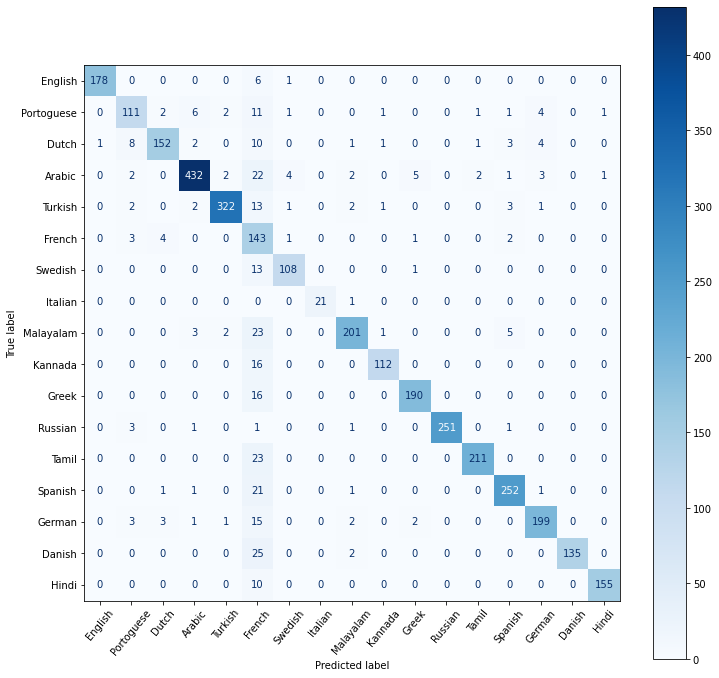

In [73]:
# plot the confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages)

disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_size_inches(12,12)
plt.xticks(rotation=50)
plt.show()